# Sine wave example using One-Class SVM

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import svm
import sklearn.metrics as met

import rrcf
from rrcf.shingle import shingle

## Generate and shingle data

In [2]:
n = 730
A = 50
center = 100
phi = 30
T = 2*np.pi/100
t = np.arange(n)
sin = A*np.sin(T*t-phi*T) + center
sin[235:255] = 80

labels = np.zeros(len(sin))
labels[235:255] = 1

In [3]:
data_dim = 4
data_index = []

data_stream = shingle(sin, data_dim)
sin_shingle = np.asarray(next(data_stream))
for i in range(1,len(sin)-data_dim+1):
    sin_shingle = np.vstack((sin_shingle, next(data_stream)))

## Establish and run OC-SVM algorithm via scikit-learn

In [4]:
outliers_fraction = 20/len(sin)
algorithm = svm.OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.1)

In [7]:
np.random.seed(0)
nIters = 100

def runOCSVM(data,data_shingle,sample_size,algorithm):
    for j in range(0,nIters):
        sample = np.random.choice(len(data_shingle),sample_size)
        algorithm.fit(data_shingle[sample,:])
    y_pred = algorithm.fit(data_shingle[sample,:]).predict(data_shingle)
    # Labels are assigned 1 if anomaly; else, label as 0
    y_pred[y_pred == -1] = 0
    
    # Compute performance metrics
    tn, fp, fn, tp = met.confusion_matrix(labels[data_dim-1:], y_pred).ravel()
    ppv = tp /(tp + fp)
    precall = tp /(tp + fn)
    
    npv = tn /(tn + fn)
    nrecall = tn /(tn + fp)
    
    acc = (tp + tn) / (tp+tn+fp+fn)
    
    print('IF, Sample size: ' + str(sample_size))
    print("Positive Precision:", ppv)
    print("Positive Recall   :", precall)
    print("Negative Precision:", npv)
    print("Negative Recall   :", nrecall)
    print("Accuracy          :", acc)
    print()
    
    # Color detected anomalies in red
    colors = np.array(['#000000', '#ff0000'])
    plt.scatter(np.linspace(0,len(data)-1,len(data)),data, s=10, color=colors[y_pred.astype(int)])
    plt.show()
    
    return y_pred

IF, Sample size: 256
Positive Precision: 0.0505952380952
Positive Recall   : 0.85
Negative Precision: 0.992327365729
Negative Recall   : 0.548797736917
Accuracy          : 0.557083906465



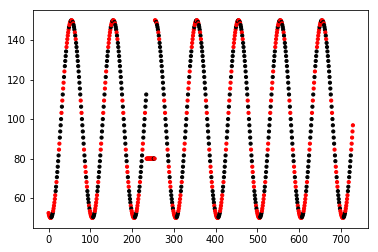

In [8]:
y_pred = runOCSVM(sin,sin_shingle,256,algorithm)

IF, Sample size: 512
Positive Precision: 0.0429292929293
Positive Recall   : 0.85
Negative Precision: 0.990936555891
Negative Recall   : 0.463932107496
Accuracy          : 0.474552957359



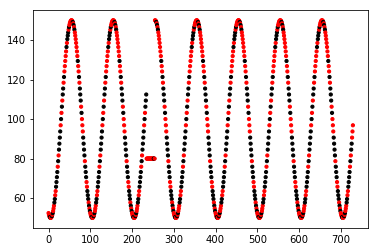

In [9]:
y_pred = runOCSVM(sin,sin_shingle,512,algorithm)